# USD dollars of export and import by country

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import os
import numpy as np
import csv
import seaborn as sns


Create the function to transform the code that generate less than 1% of total dollars in "Othe Flower bulbs" and one class to associate codes with colors

In [2]:
def define_country(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Others"

class ColorGenerator:
    def __init__(self):
        self.colors = ['#edd09e', '#1de286', '#5d680a', '#296d0a', '#02ede0', '#ad81d1', '#86afe8',
                       '#69e234', '#cae01d', '#e894e3', '#0c633b', '#d6e088', '#e52bda', '#e01a8d',
                       '#d18e91', '#63440d', '#560909', '#db8ab9', '#8b8c7e', '#86ceca', '#f2aa2e',
                       '#f21515', '#f9acac', '#081156', '#700e12', '#ef1019', '#2075ea', '#390f5b',
                       '#8de0b9', '#8823db', '#afe896', '#ba96ab', '#8e0286', '#8e0153']
        self.colors = ['#ed2d2d', "#9daedb", '#1a8438', '#ffe900', "#0ac9b6",
                       "#0e2e84", '#74e804', "#7d0cc9", "#e410e8", '#f9a200',
                       '#11c645', '#30540d', "#963377", "#000000", "#7a784b"] #15 colores
        self.index_color = 0
        self.dict_color = {}
        
    def color(self, code):
        if code in self.dict_color:
            return self.dict_color[code]
        self.dict_color[code] = self.colors[self.index_color]
        self.index_color += 1
        return self.dict_color[code]
    
    def reset(self):
        self.index_color = 0
        self.dict_color = {}
        
generator = ColorGenerator()


Define path of file, columns that we need to analize and read file

In [3]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["TOTALVALORFOB", "PAISDESTINO", "YEAR", "GROUP"]
usecols_import =  ["CIF", "PA_ORIG", "YEAR", "GROUP"]


data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)


Generate plots

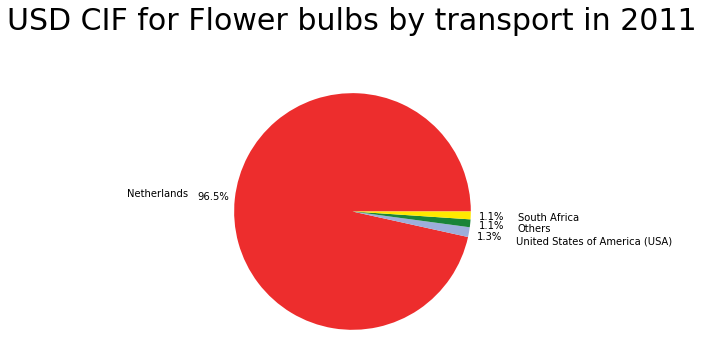

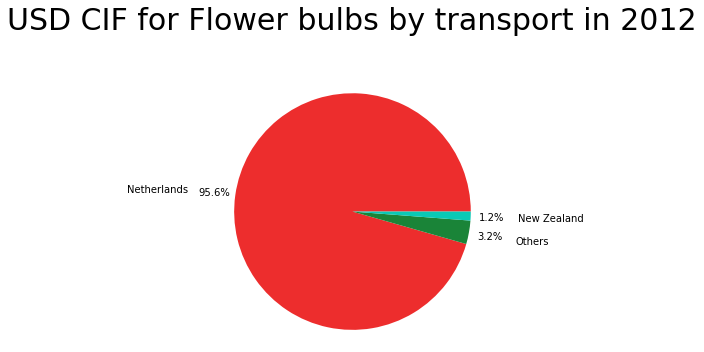

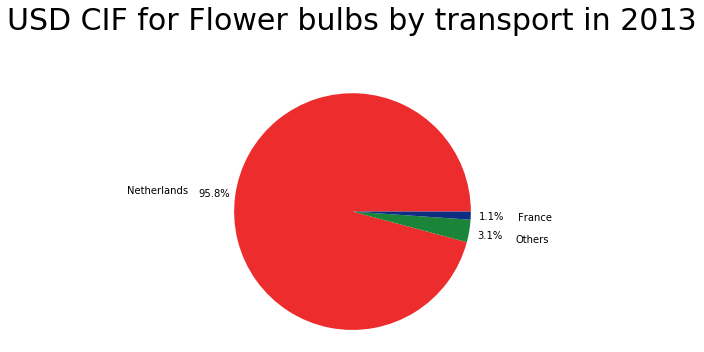

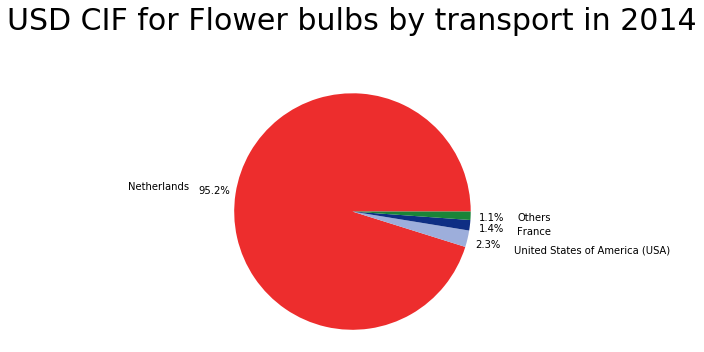

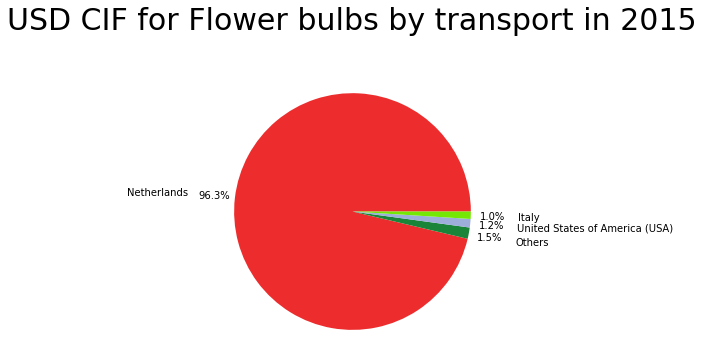

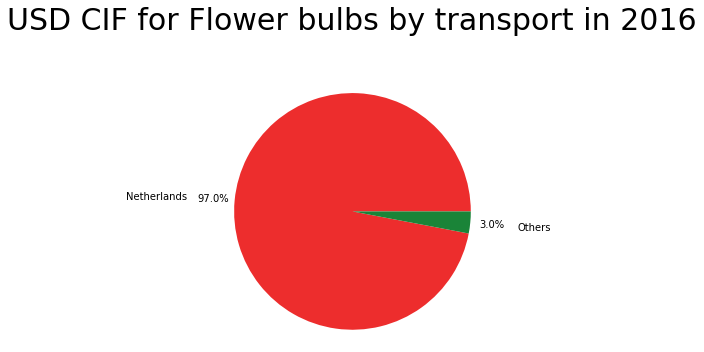

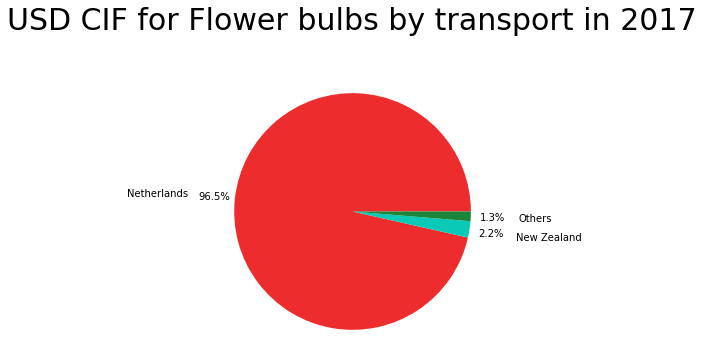

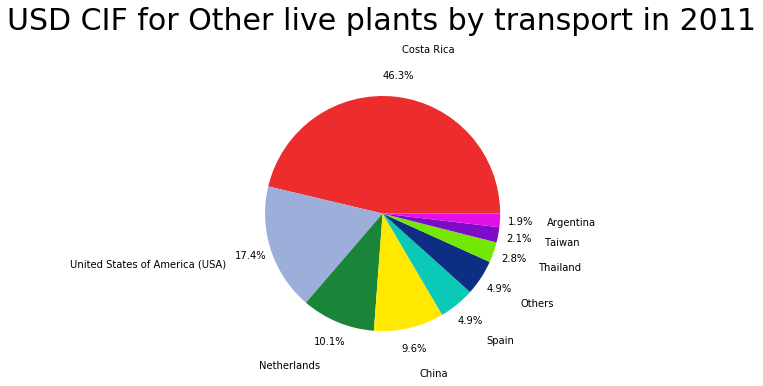

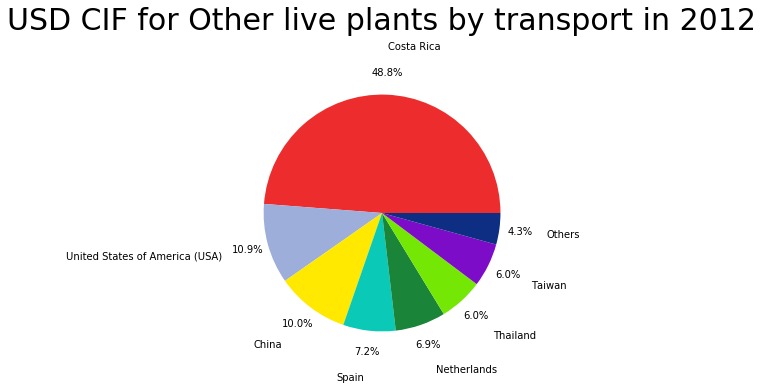

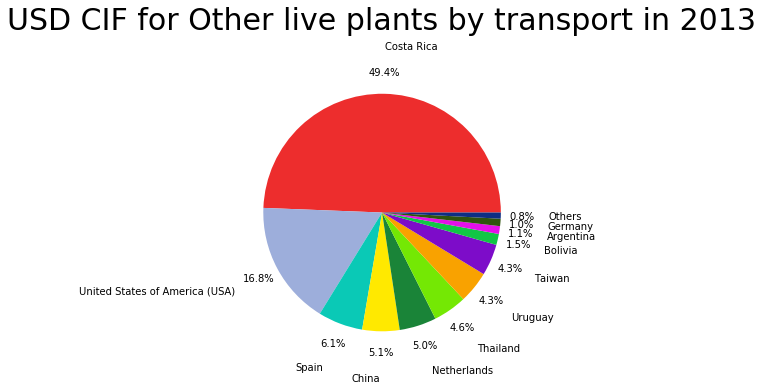

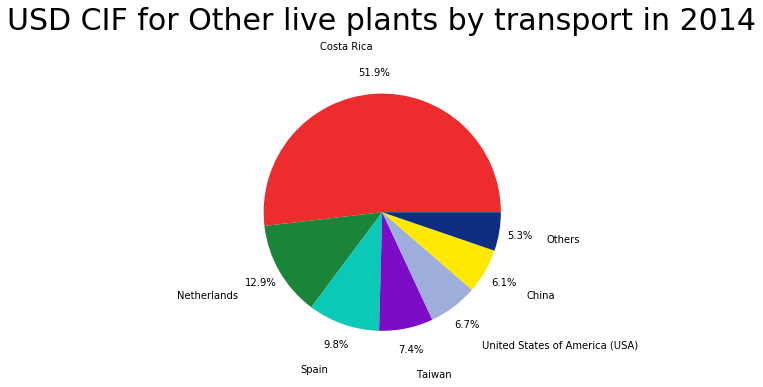

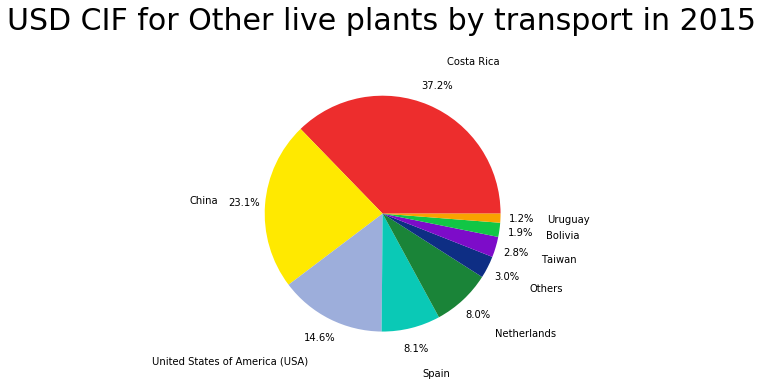

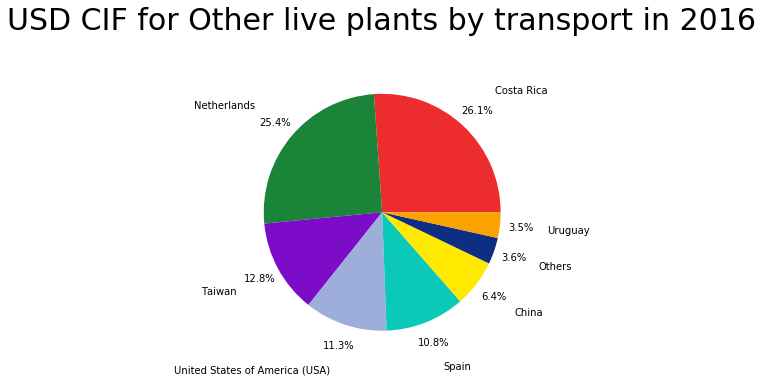

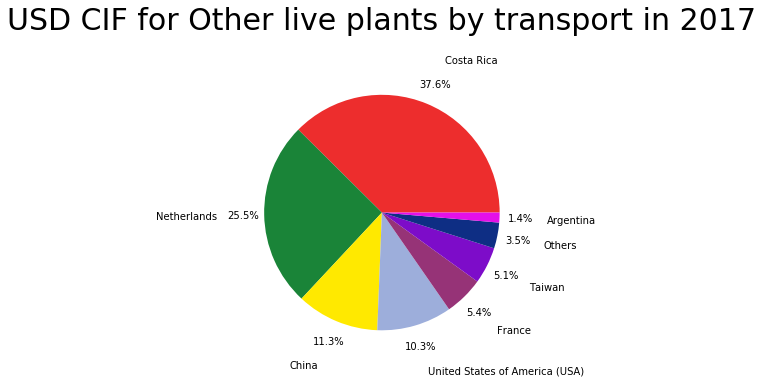

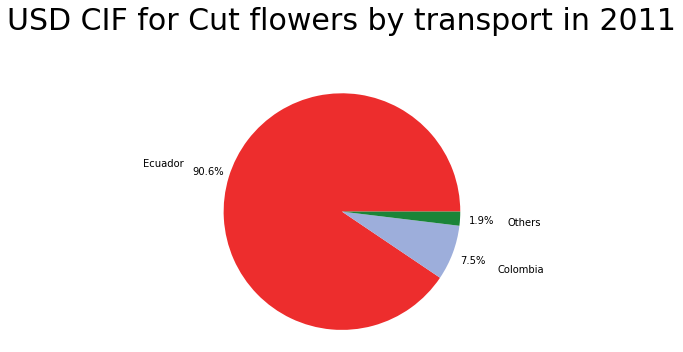

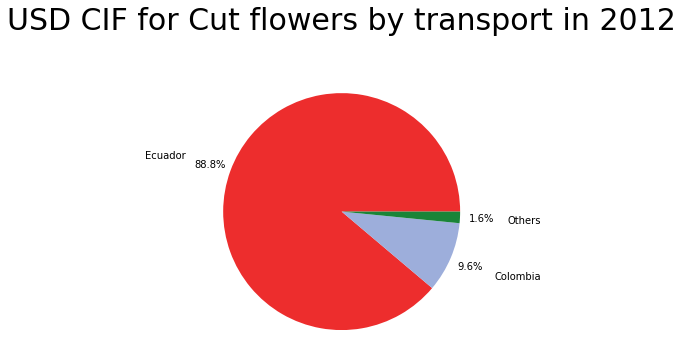

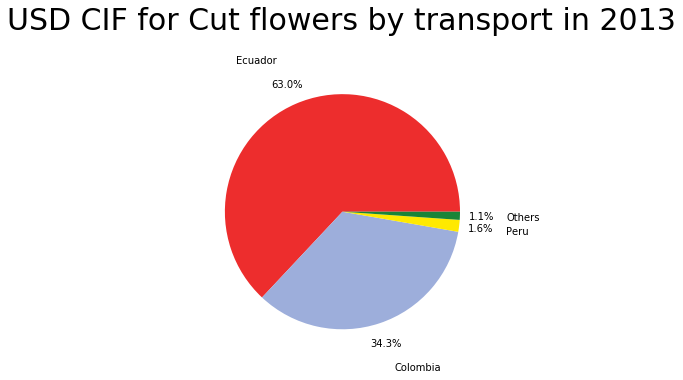

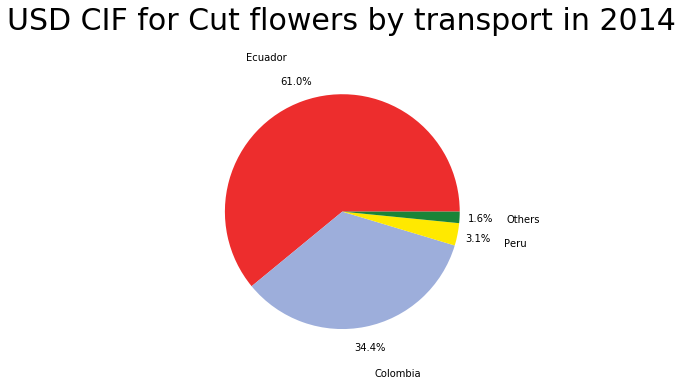

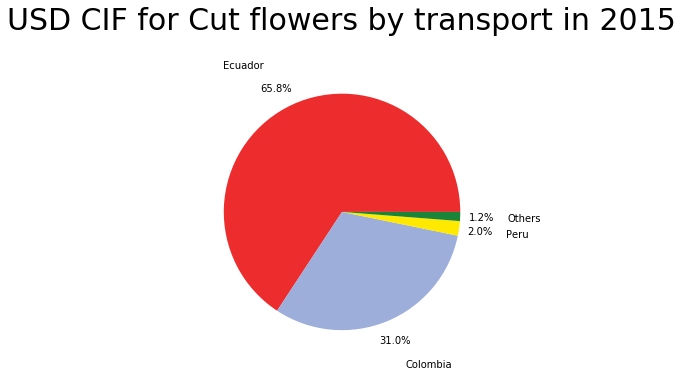

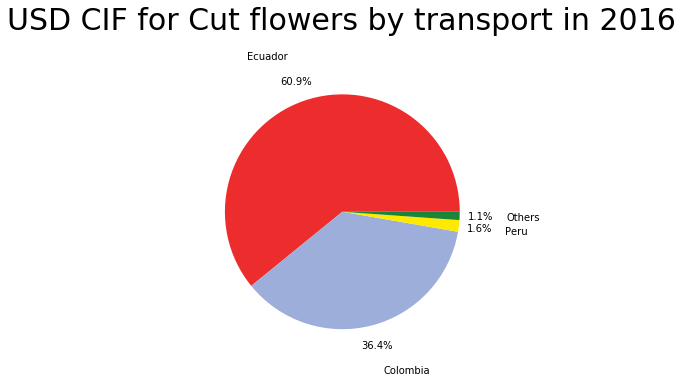

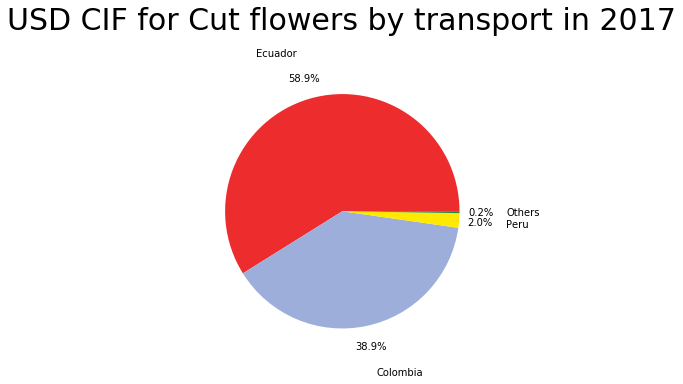

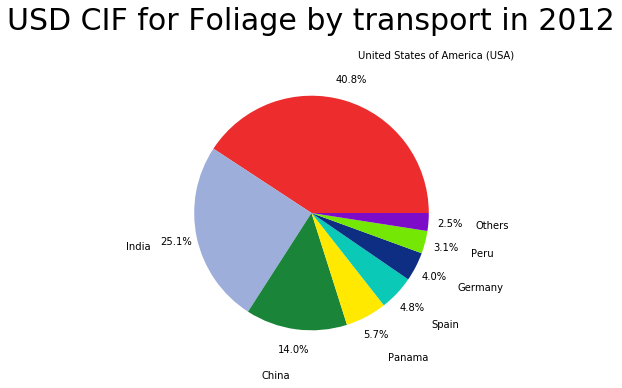

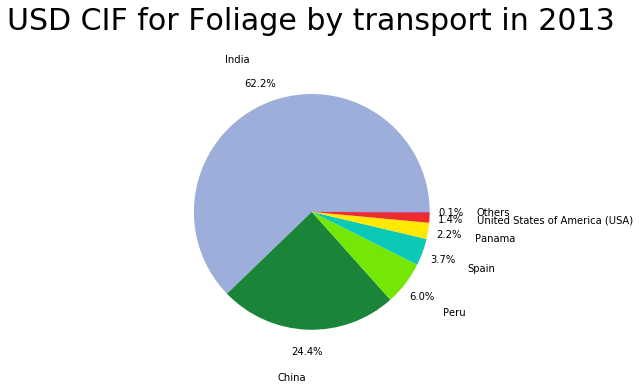

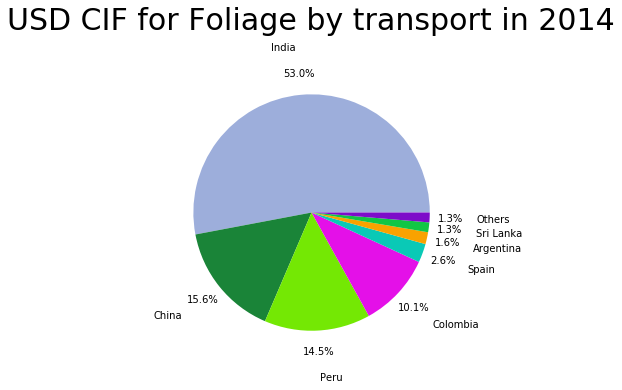

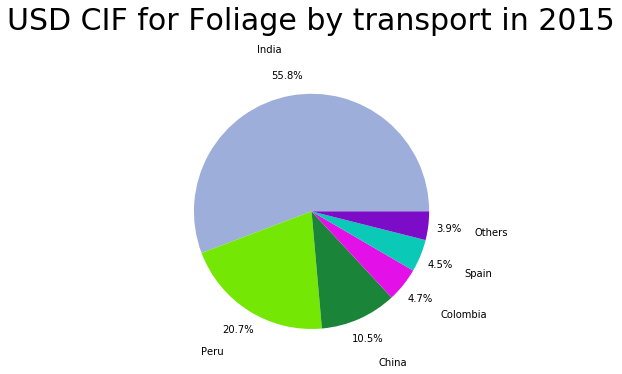

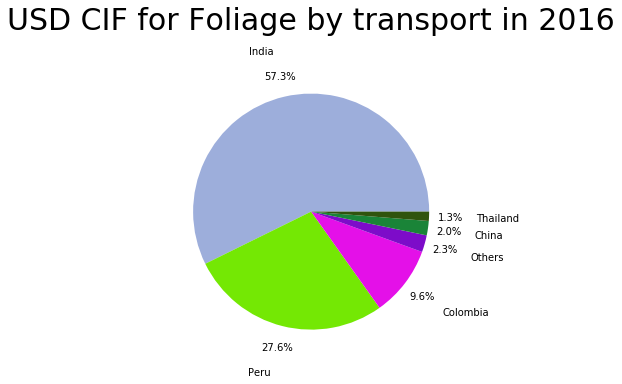

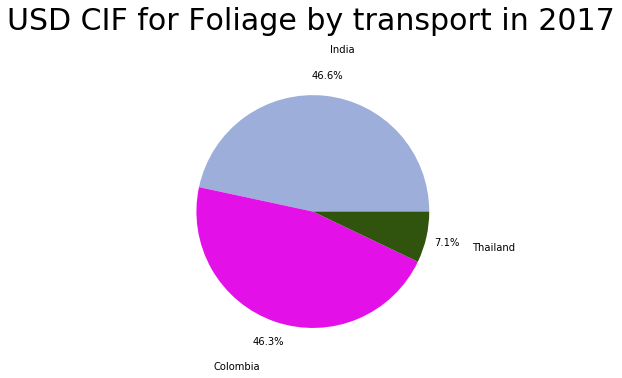

In [4]:
for group in ["Flower bulbs", "Other live plants", "Cut flowers", "Foliage"]:
    new_data = data_import[data_import["GROUP"] == group]
    
    for year in range(2011, 2018):
        temporal_data = new_data[new_data["YEAR"] == year]

        if not temporal_data.empty:
            sums = temporal_data.groupby(['PA_ORIG']).sum().reset_index()
            total = sums["CIF"].sum()

            sums['COUNTRY'] = sums.apply(lambda x: define_country(x, total), axis=1)

            aux = sums[["COUNTRY", "CIF"]].groupby("COUNTRY").sum()
            aux = aux.sort_values("CIF", ascending=False)


            plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                    autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                    labeldistance=1.4)


            plt.axis('equal')
            plt.tight_layout()

            plt.title("USD CIF for {} by transport in {}".format(group, year), fontdict ={'fontsize': 30}, y=1.18)

            plt.savefig("USD CIF for {} by transport in {}".format(group, year), bbox_inches='tight')
            plt.show()
    generator.reset()

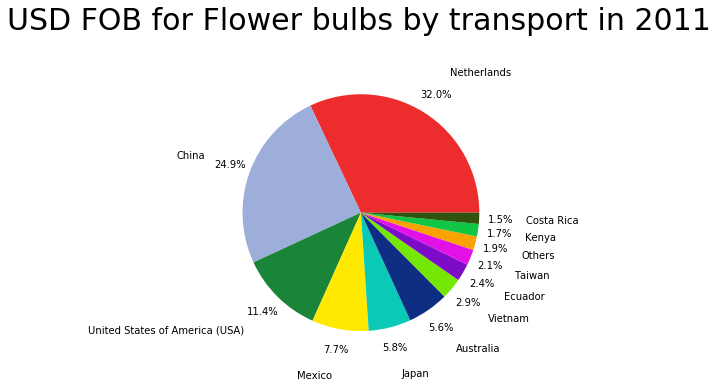

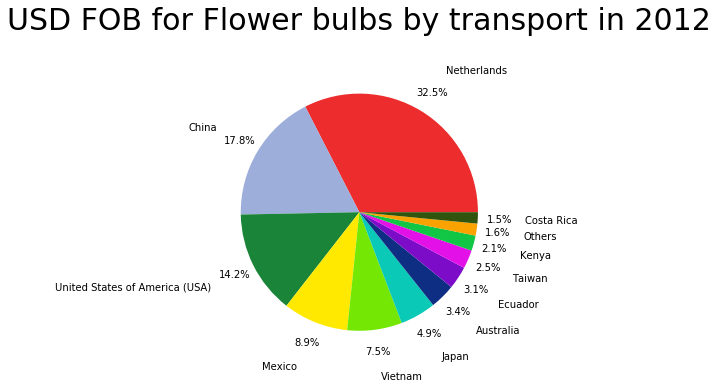

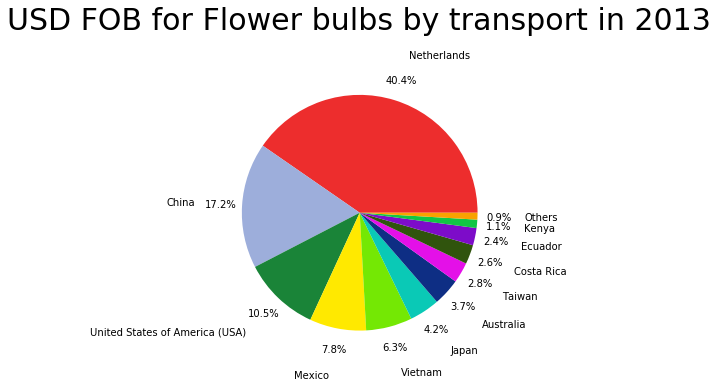

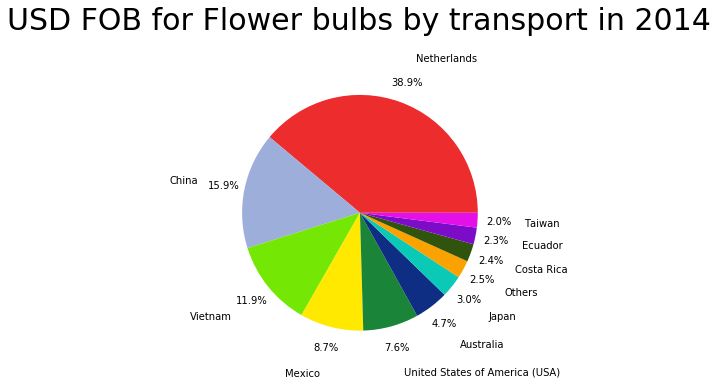

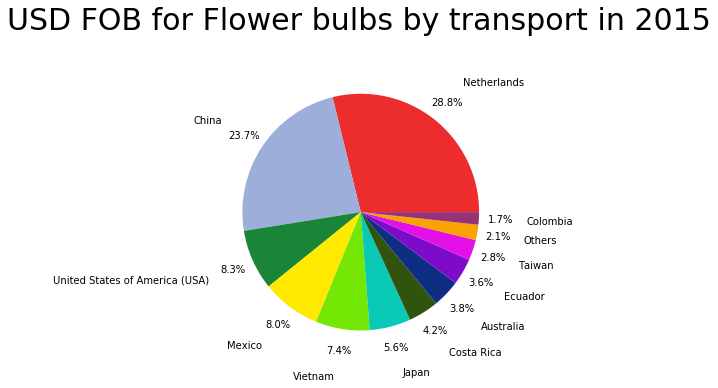

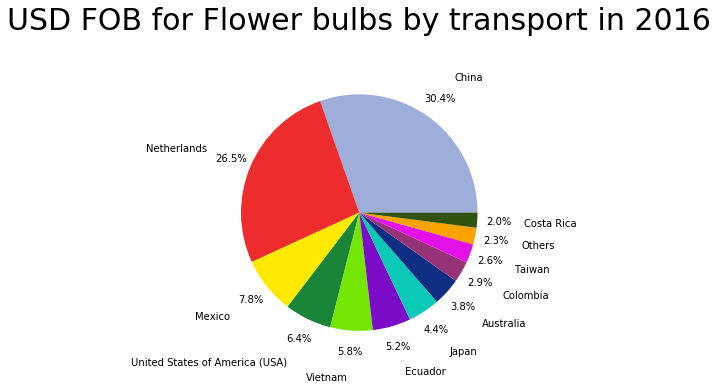

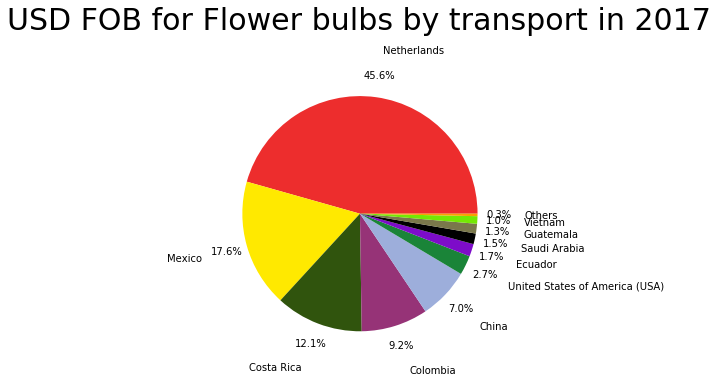

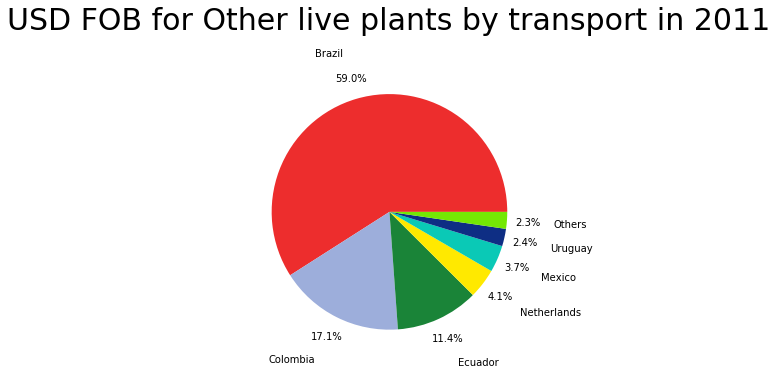

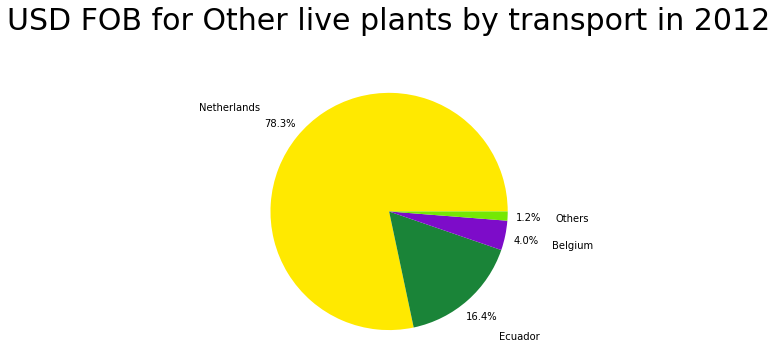

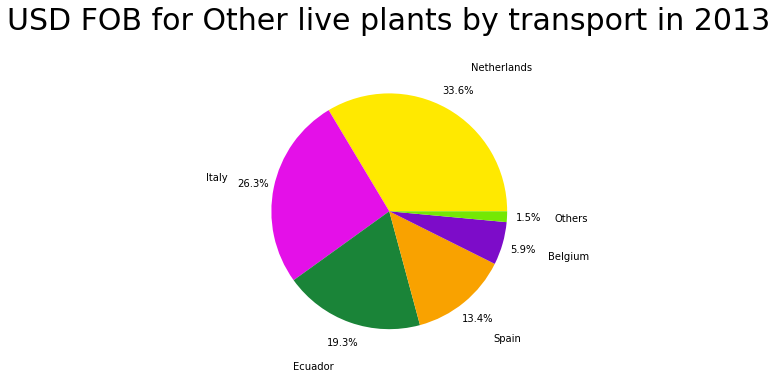

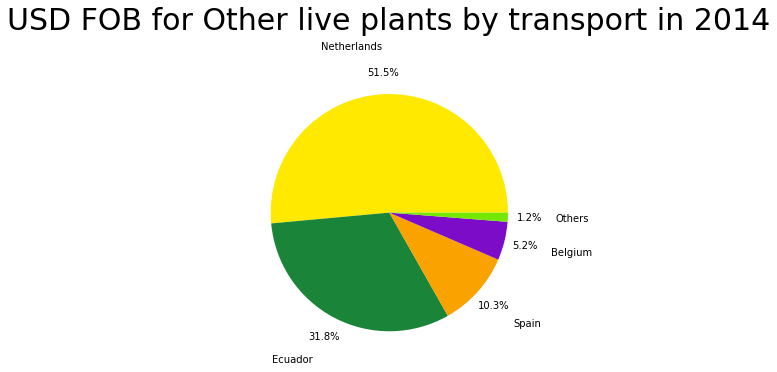

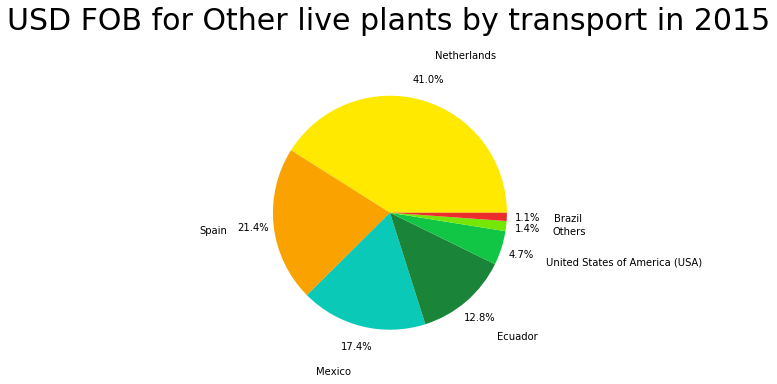

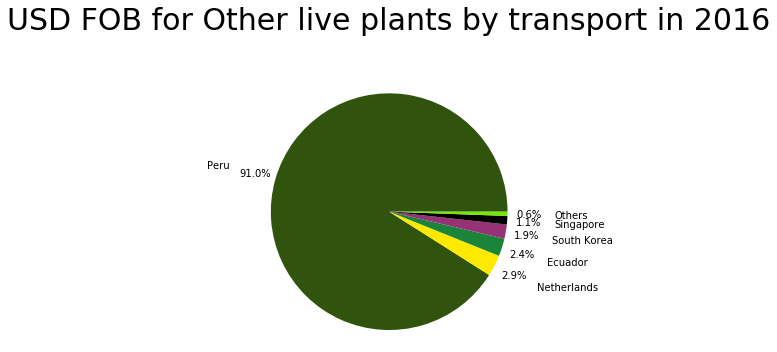

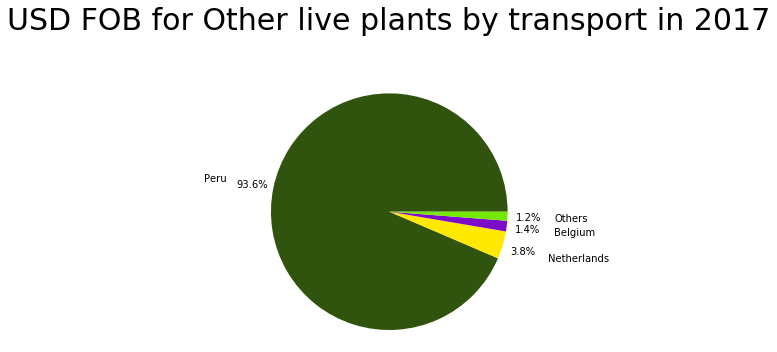

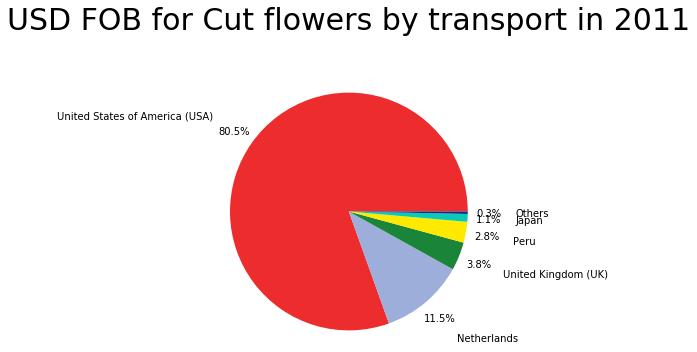

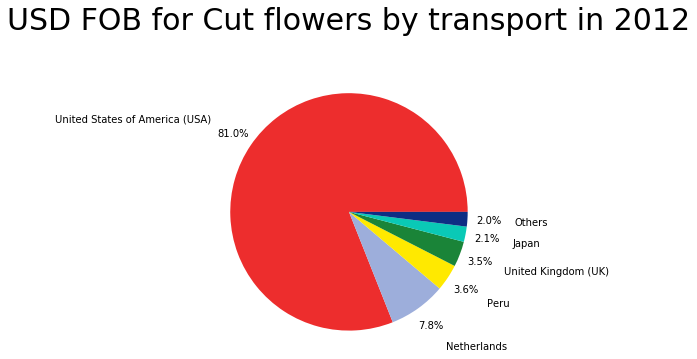

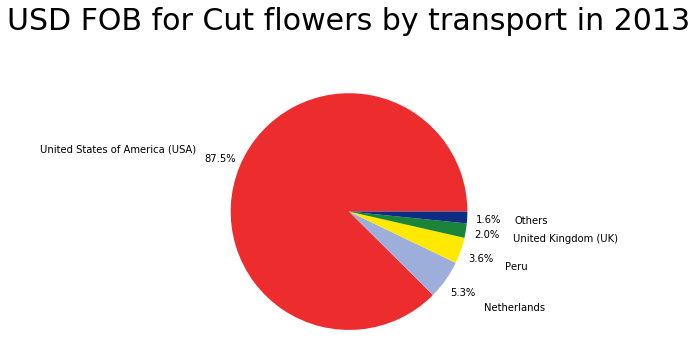

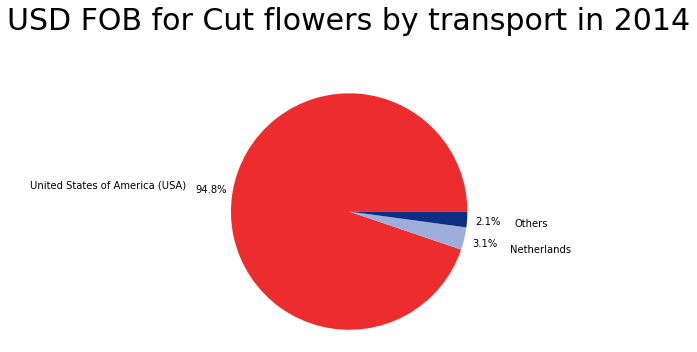

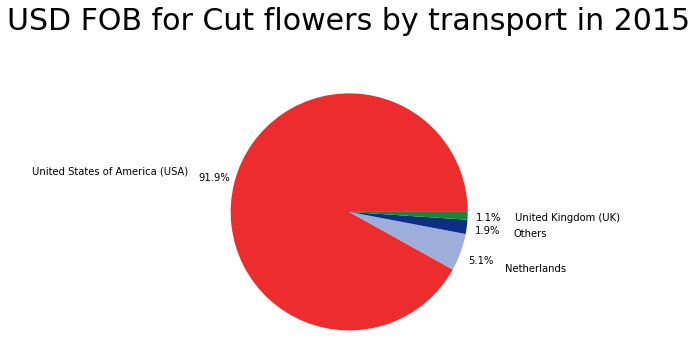

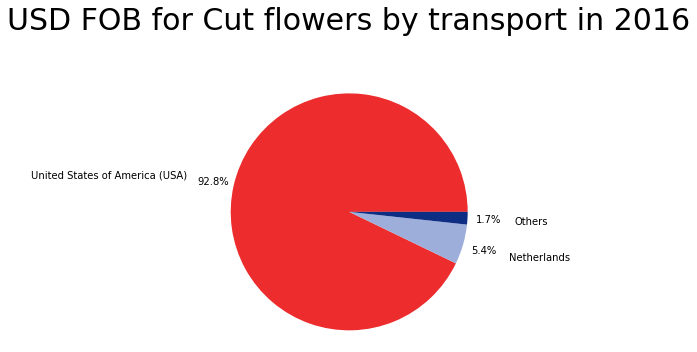

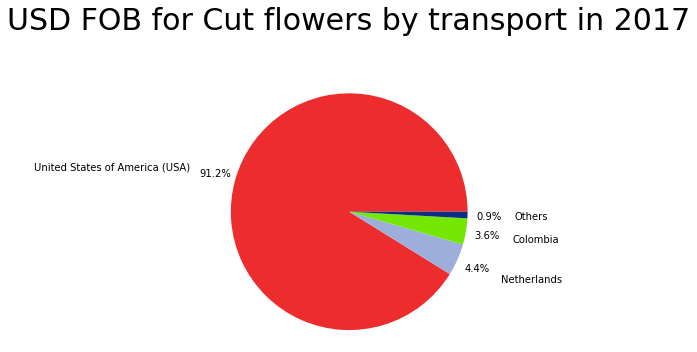

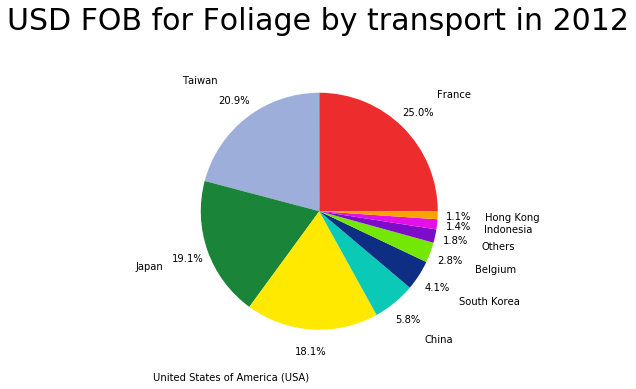

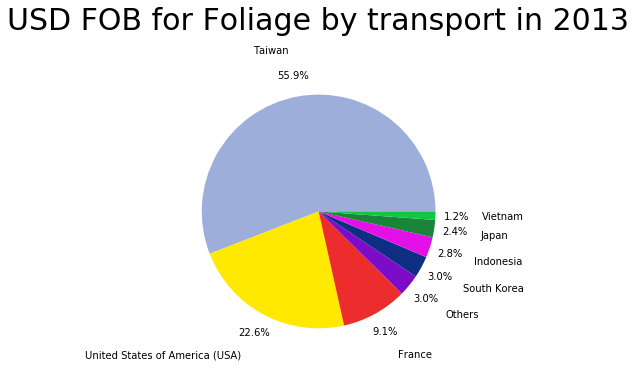

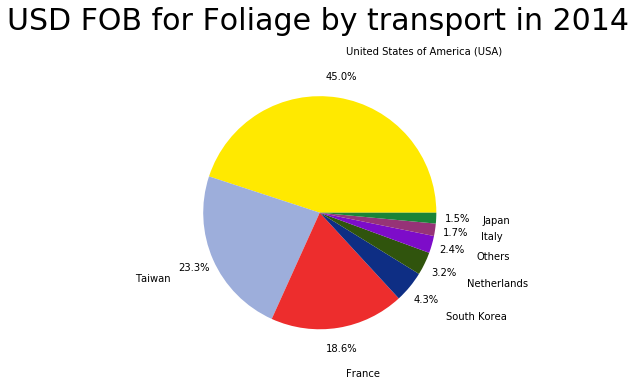

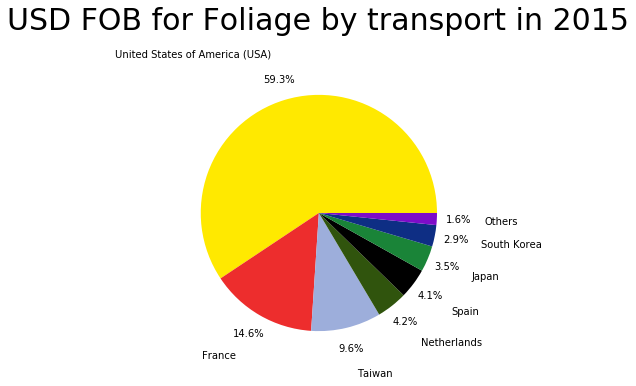

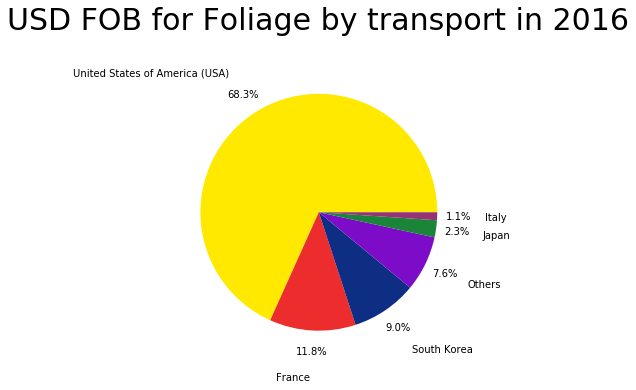

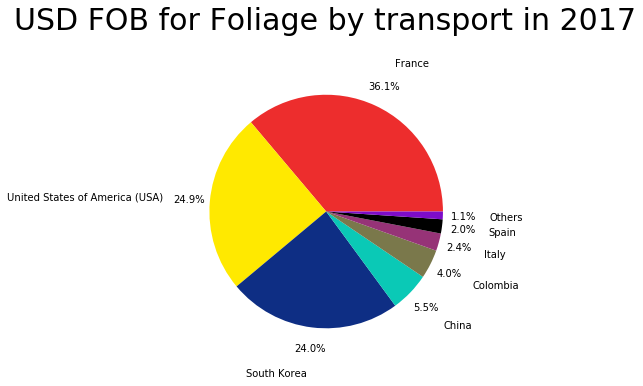

In [6]:
for group in ["Flower bulbs", "Other live plants", "Cut flowers", "Foliage"]:
    new_data = data_export[data_export["GROUP"] == group]
    
    for year in range(2011, 2018):
        temporal_data = new_data[new_data["YEAR"] == year]

        if not temporal_data.empty:
            sums = temporal_data.groupby(['PAISDESTINO']).sum().reset_index()
            total = sums["TOTALVALORFOB"].sum()

            sums['COUNTRY'] = sums.apply(lambda x: define_country(x, total), axis=1)

            aux = sums[["COUNTRY", "TOTALVALORFOB"]].groupby("COUNTRY").sum()
            aux = aux.sort_values("TOTALVALORFOB", ascending=False)


            plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                    autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                    labeldistance=1.4)


            plt.axis('equal')
            plt.tight_layout()

            plt.title("USD FOB for {} by transport in {}".format(group, year), fontdict ={'fontsize': 30}, y=1.18)

            plt.savefig("USD FOB for {} by transport in {}".format(group, year), bbox_inches='tight')
            plt.show()
    generator.reset()